# Title: Stock Price Prediction Using Recurrent Neural Network and Long Short-Term Memory

#### Members' Names or Individual's Name: **DEVIKA RAMAKRISHNAN, MIDHULA MATHEW**
####  Emails:200573393@student.georgianc.on.ca, 200574716@student.georgianc.on.ca

GITHUB LINK - https://github.com/krishnaik06
Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ

RESEARCH PAPER - https://www.researchgate.net/publication/349174849_Stock_Price_Prediction_Using_Recurrent_Neural_Network_and_Long_Short-Term_Memory

# Introduction:

#### **Problem Description**:
The aim of this work is to leverage deep learning architectures to uncover and utilize underlying patterns within National Stock Exchange listed companies' data for accurate price prediction. The study explores two distinct deep learning models with the primary goal of achieving the most precise forecasts with minimal error. Specifically, the focus is on employing Recurrent Neural Networks (RNNs) to forecast future stock prices within short-term intervals.

#### **Context of the Problem**:

The problem of predicting stock prices using Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) is crucial due to its direct impact on investors and financial markets. Accurate predictions empower investors to make informed decisions, optimizing gains and minimizing risks. Traditional methods often fall short in capturing the intricate dynamics present in stock market data, especially for short-term forecasts. By leveraging RNNs and LSTM, this study aims to revolutionize stock price prediction by uncovering hidden patterns and offering more precise short-term predictions, enabling better investment strategies and financial decision-making in the market.

#### **Limitation About other Approaches**:

Prior approaches like fundamental and statistical analysis, along with methods such as Genetic Algorithms and Artificial Neural Networks (ANNs), have limitations in establishing a clear correlation between Long Short-Term Memory (LSTM) dynamics and stock prices. Simple ANNs struggle with exploding gradient conditions, resulting in convergence issues due to fluctuating weights. These limitations hinder their accuracy in capturing the intricate relationship between LSTM dynamics and stock price changes.
#### **Solution**:

The method discussed, utilizing Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM), solves the challenge of accurate stock price prediction for National Stock Exchange listed companies. By processing historical data from 2012 to 2016, training the model, and testing it against future stock prices in 2017, this approach successfully predicts near-future stock prices with remarkable precision. This solution aids investors in making informed decisions, mitigating risks, and maximizing profits by leveraging advanced deep learning architectures to anticipate dynamic stock market changes.

# Background



| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Stock price prediction using LSTM, RNN and CNN-sliding window model [1] | A deep learning based formalization for stockprice prediction| NSE stock price data| the  model cannot predict the prices correctly whenever there is a sudden change in the market




# Methodology

The established method utilizes RNNs and LSTM for stock price prediction, leveraging data from 2012 to 2016 and standard libraries like NumPy, Pandas, Keras, and SkLearn. Our contribution seeks to refine this approach, possibly by optimizing model architecture or employing advanced preprocessing techniques to enhance accuracy. Subsequent sections will elaborate on these enhancements with visual aids depicting modifications made to the existing method.

# Implementation

In this section, you will provide the code and its explanation. You may have to create more cells after this. (To keep the Notebook clean, do not display debugging output or thousands of print statements from hundreds of epochs. Make sure it is readable for others by reviewing it yourself carefully.)

In [3]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Importing the training set
dataset_train = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
dataset_train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [7]:
dataset_train.shape

(1258, 6)

In [8]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [9]:
dataset_train.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [10]:
dataset_train.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [11]:
dataset_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


<ipython-input-12-cb2fe5930008>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['High'],color="green")


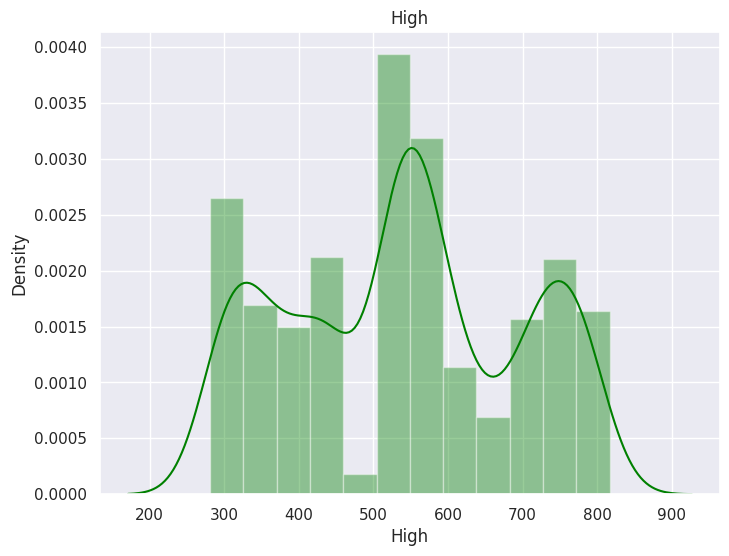

In [12]:
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(dataset_train['High'],color="green")
plt.title("High")
plt.show()

<ipython-input-13-2f155b91a0ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['Low'],color="red")


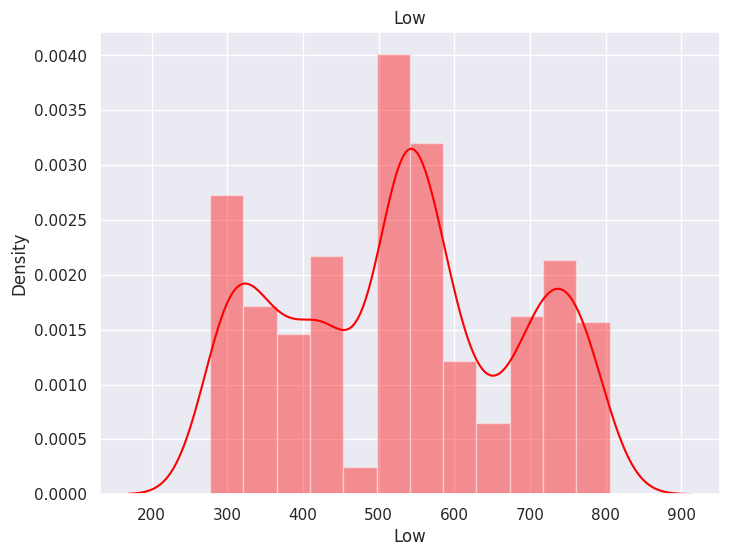

In [13]:
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(dataset_train['Low'],color="red")
plt.title("Low")
plt.show()

<Figure size 640x480 with 0 Axes>

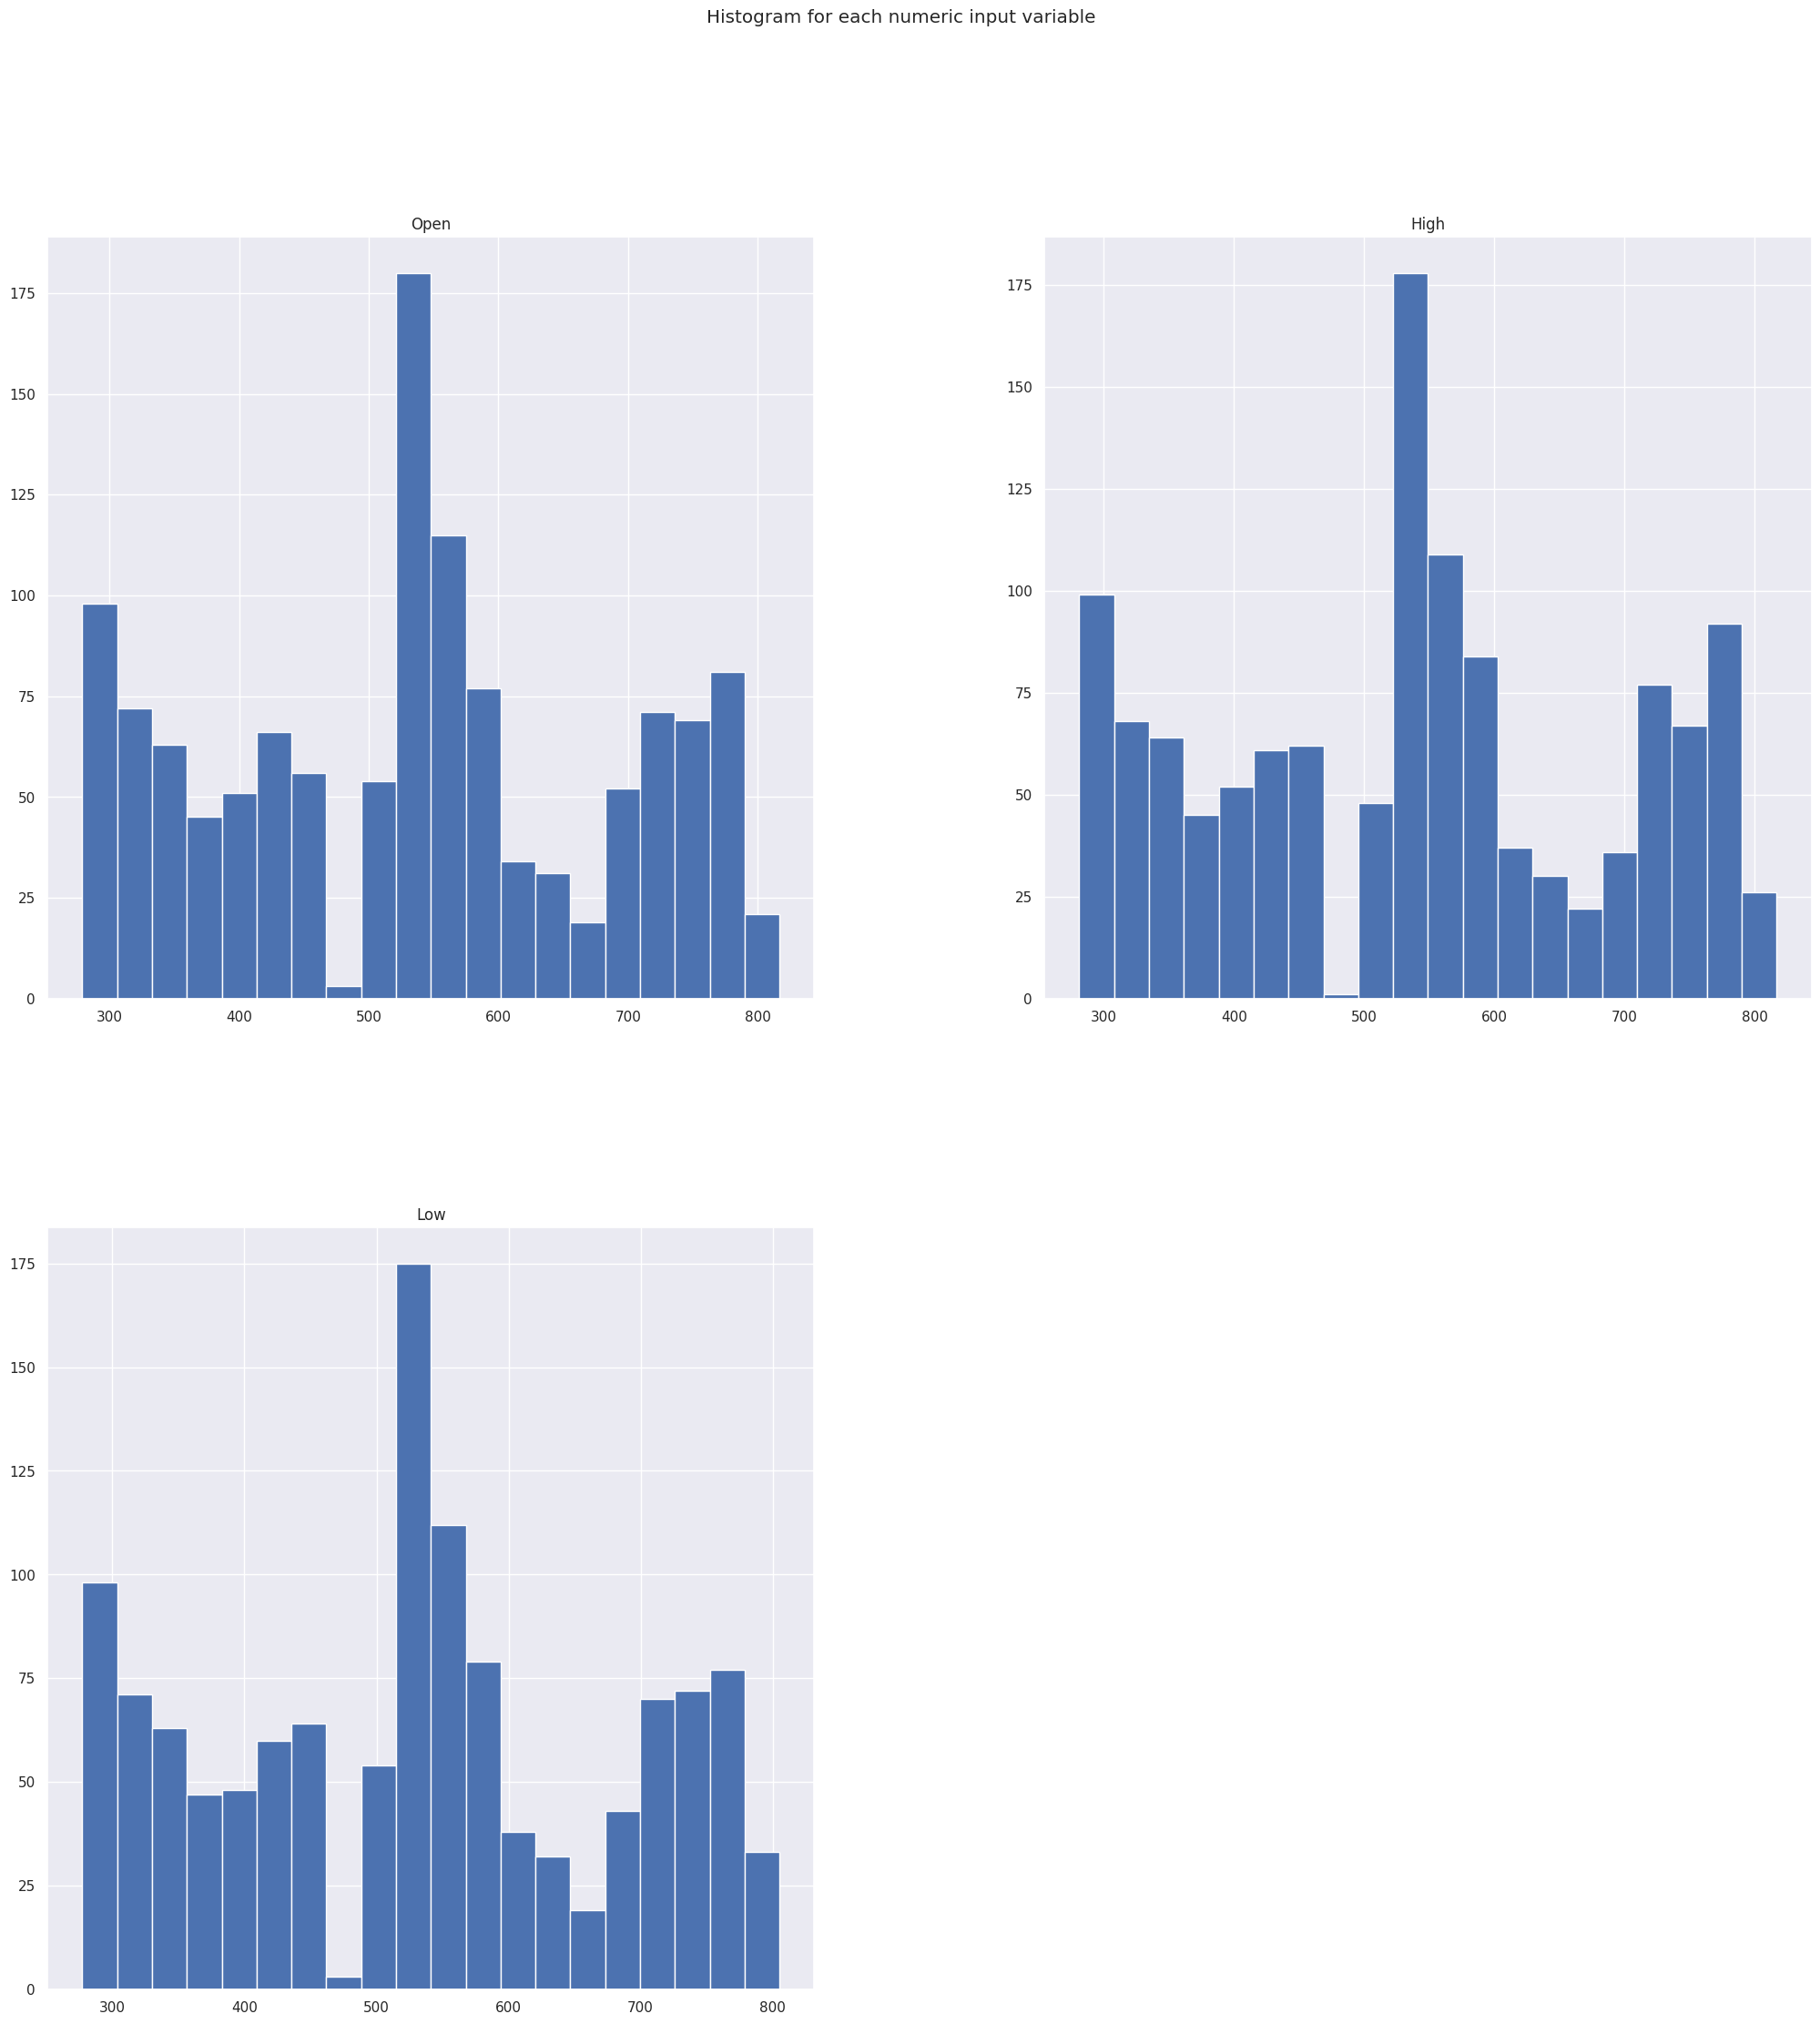

In [14]:
plt.savefig('data_box')
plt.show()
import pylab as plot
dataset_train.hist(bins=20,figsize=(25,25))
plt.suptitle('Histogram for each numeric input variable')
plt.savefig('data_hist')
plt.show()

<ipython-input-15-cd3555a71d16>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=dataset_train.corr()


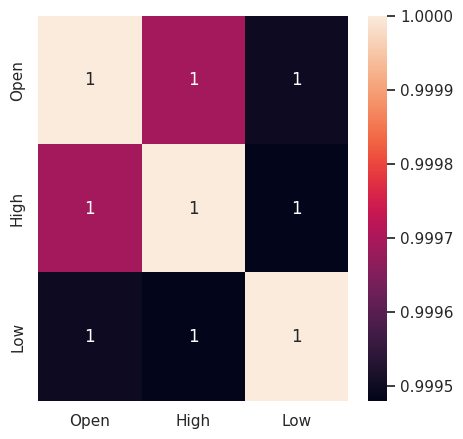

In [15]:
plt.figure(figsize=(5,5))
correlation=dataset_train.corr()
sns.heatmap(correlation, annot=True)
plt.show()


In [16]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i - 60 : i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [19]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [20]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [21]:
# Initialising the RNN
regressor = Sequential()

In [22]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [23]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [24]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [25]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [26]:
regressor.add(Dense(units=64, activation='relu'))

In [27]:
# Adding the output layer
regressor.add(Dense(units=1))

In [28]:
# Compiling the RNN
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [29]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
38/38 [==============================] - 8s 76ms/step - loss: 0.0533
Epoch 2/50
38/38 [==============================] - 3s 69ms/step - loss: 0.0070
Epoch 3/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0050
Epoch 4/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0054
Epoch 5/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0046
Epoch 6/50
38/38 [==============================] - 3s 79ms/step - loss: 0.0043
Epoch 7/50
38/38 [==============================] - 3s 66ms/step - loss: 0.0043
Epoch 8/50
38/38 [==============================] - 2s 66ms/step - loss: 0.0037
Epoch 9/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0041
Epoch 10/50
38/38 [==============================] - 3s 80ms/step - loss: 0.0034
Epoch 11/50
38/38 [==============================] - 3s 67ms/step - loss: 0.0036
Epoch 12/50
38/38 [==============================] - 3s 68ms/step - loss: 0.0030
Epoch 13/50
38/38 [==================

In [30]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv("Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [31]:
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [32]:
dataset_test.tail()

,Date,Open,High,Low,Close,Volume
15,1/25/2017,829.62,835.77,825.06,835.67,"1,494,500"
16,1/26/2017,837.81,838.00,827.01,832.15,"2,973,900"
17,1/27/2017,834.71,841.95,820.44,823.31,"2,965,800"
18,1/30/2017,814.66,815.84,799.80,802.32,"3,246,600"
19,1/31/2017,796.86,801.25,790.52,796.79,"2,160,600"


In [33]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    20 non-null     object 
 1   Open    20 non-null     float64
 2   High    20 non-null     float64
 3   Low     20 non-null     float64
 4   Close   20 non-null     float64
 5   Volume  20 non-null     object 
dtypes: float64(4), object(2)
memory usage: 1.1+ KB


In [34]:
dataset_test.columns.values

array(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype=object)

In [35]:
dataset_test.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [36]:
dataset_test.describe()

,Open,High,Low,Close
count,20.000000,20.000000,20.000000,20.000000
mean,807.526000,811.926500,801.949500,807.904500
std,15.125428,14.381198,13.278607,13.210088
min,778.810000,789.630000,775.800000,786.140000
25%,802.965000,806.735000,797.427500,802.282500
50%,806.995000,808.640000,801.530000,806.110000
75%,809.560000,817.097500,804.477500,810.760000
max,837.810000,841.950000,827.010000,835.670000


<ipython-input-37-6ca9ea1df2c8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_test['High'],color="green")


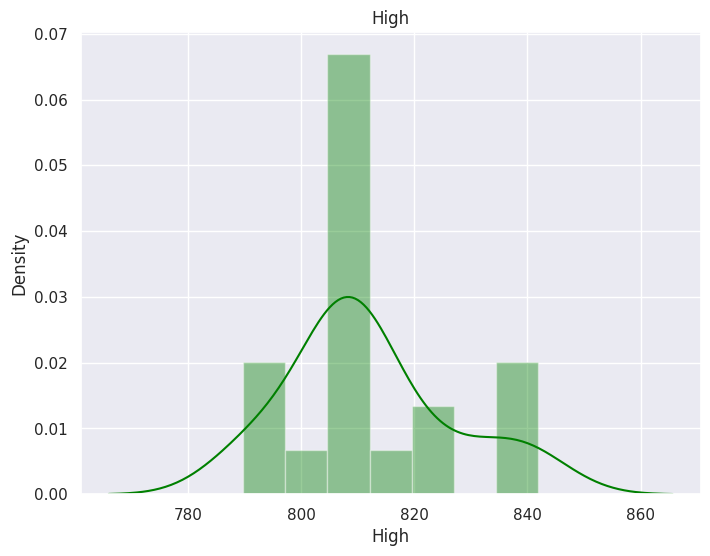

In [37]:
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(dataset_test['High'],color="green")
plt.title("High")
plt.show()

<ipython-input-38-2f155b91a0ae>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_train['Low'],color="red")


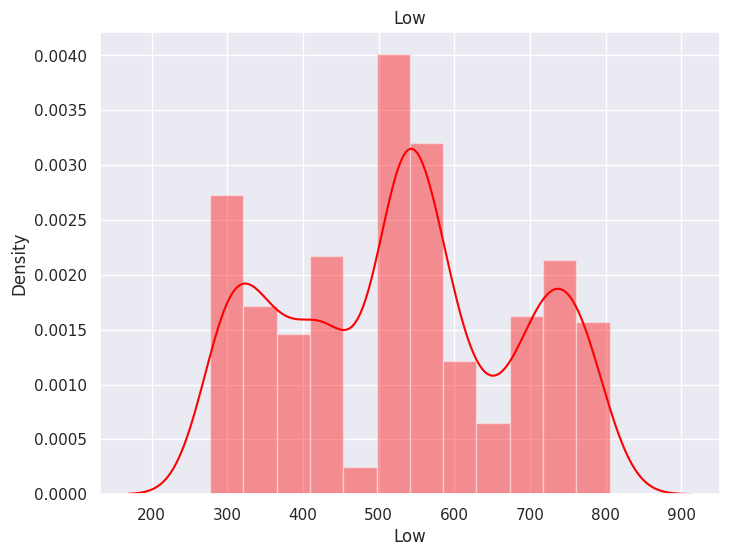

In [38]:
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(dataset_train['Low'],color="red")
plt.title("Low")
plt.show()

<ipython-input-39-5cf5ad644d34>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=dataset_test.corr()


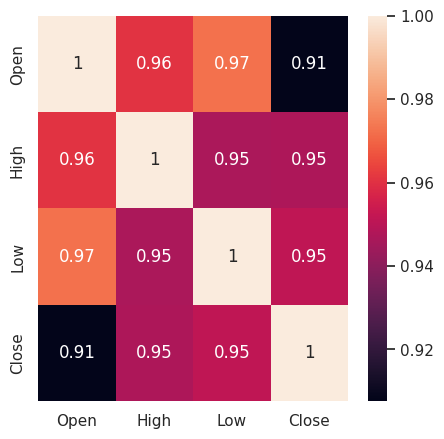

In [39]:
plt.figure(figsize=(5,5))
correlation=dataset_test.corr()
sns.heatmap(correlation, annot=True)
plt.show()


In [40]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train["Open"], dataset_test["Open"]), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 :].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i - 60 : i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


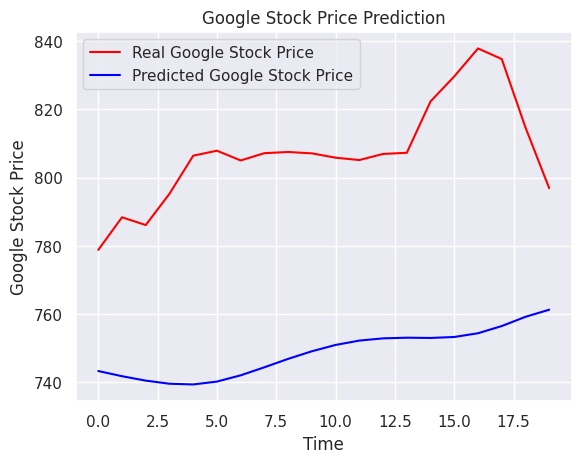

In [41]:
# Visualising the results
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

# Our Contribution

Our contribution involves expanding the model by incorporating additional LSTM layers or adjusting the existing ones. This enhancement may encompass fine-tuning the number of units or neurons within each layer, or modifying their configurations to improve the model's predictive capabilities.

Our contribution also encompasses an extensive incorporation of exploratory data analysis (EDA) and visualizations. This addition involves comprehensive data exploration techniques and a multitude of visual representations, aiding in a deeper understanding of the underlying patterns within the dataset.







# Conclusion and Future Direction


Through this project, I've learned the efficacy of RNNs and LSTM in predicting stock prices using historical data. The model demonstrated competence in foreseeing near-future stock values, particularly for Google's stock from Jan 2017.

However, the model's limitations were evident in responding to sudden market changes, indicating the need for ongoing enhancements. Future improvements might involve diversifying datasets, incorporating sentiment analysis, or exploring ensemble methods to bolster the model's adaptability to market dynamics.

This project highlights the tool's potential for investors but emphasizes the necessity for prudent decision-making, given the financial market's unpredictable nature. Ultimately, while predictive models aid in decision-making, they're not infallible in volatile markets.







# References:

[1]:  Vivek Rajput, Sarika Bobde STOCK MARKET FORECASTING TECHNIQUES: LITERATURE SURVEY. Department of Computer Engineering, Maharashtra Institute of Technology, Pune, India IJCSMC, Vol.5, Issue. 6, June 2016, pg.500 506.


[2]:  Ashutosh Nayak Predicting Stock with LSTM
https://towardsdatascience.com/predicting-stock-price-with-lstm13af86a74944

[3]:  elekshmy Selvin, Vinayakumar R, Gopalakrishnan E.A, Vijay Krishna Menon, Soman K.P STOCK PRICE PREDICTION USING
LSTM,RNNAND CNN-SLIDING WINDOW MODEL Centre for Computational Engineering and Networking (CEN),Amrita School of Engineering,Coimbatore. DOI: 10.1109/ICACCI.2017.8126078 Conference: 2017 International Conference on Advances in Computing communications and Informatics (ICACCI)
